In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('Distributor Outlet Mapping.csv')
df2 = pd.read_csv('Outlet Info.csv')
df3 = pd.read_csv('Sales.csv')

In [3]:
df1.head()

,distributor_id,outlet_id
0,distributor_24,outlet_code_1
1,distributor_24,outlet_code_2
2,distributor_24,outlet_code_3
3,distributor_3,outlet_code_4
4,distributor_21,outlet_code_5


In [4]:
df2.head()

,outlet_id,region,outlet_size,population_density,number_of_skus_sold,average_household_income
0,outlet_code_1,outstation,1334,276,16,81704
1,outlet_code_2,outstation,1336,276,16,81789
2,outlet_code_3,outstation,1341,277,16,82046
3,outlet_code_4,outstation,1025,239,13,66259
4,outlet_code_5,upcountry,3965,646,35,59469


In [5]:
df3.head()

,outlet_id,transaction_time,expected_rainfall,freezer_status,sku_name,sales_quantity
0,outlet_code_78,2023-01-05 12:41,25mm,freezers available,Sweet Delights Mix,3
1,outlet_code_78,2023-01-12 13:05,0mm,freezers available,Sweet Delights Mix,3
2,outlet_code_78,2023-01-17 9:32,79mm,freezers available,Sweet Delights Mix,3
3,outlet_code_78,2023-01-27 14:21,194.51mm,freezers available,Sweet Delights Mix,2
4,outlet_code_78,2023-01-31 16:24,15mm,freezers available,Sweet Delights Mix,3


In [6]:
merged_table = pd.merge(df1, df2, on='outlet_id', how='inner')
merged_table = pd.merge(merged_table, df3, on='outlet_id', how='inner')
merged_table.head()

,distributor_id,outlet_id,region,outlet_size,population_density,number_of_skus_sold,average_household_income,transaction_time,expected_rainfall,freezer_status,sku_name,sales_quantity
0,distributor_24,outlet_code_1,outstation,1334,276,16,81704,2023-01-06 10:51,60mm,freezers available,Fruit Chewy Bites,4
1,distributor_24,outlet_code_1,outstation,1334,276,16,81704,2023-01-12 15:14,6mm,freezers available,Fruit Chewy Bites,5
2,distributor_24,outlet_code_1,outstation,1334,276,16,81704,2023-01-16 16:25,82mm,freezers available,Fruit Chewy Bites,5
3,distributor_24,outlet_code_1,outstation,1334,276,16,81704,2023-01-24 8:55,172.53mm,freezers available,Fruit Chewy Bites,7
4,distributor_24,outlet_code_1,outstation,1334,276,16,81704,2023-02-04 9:53,59mm,freezers available,Fruit Chewy Bites,5


In [7]:
# Assuming you have already created the merged_table DataFrame

for column in merged_table.columns:
    unique_values = merged_table[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")


Unique values for distributor_id:
['distributor_24' 'distributor_3' 'distributor_21' 'distributor_2'
 'distributor_1' 'distributor_7' 'distributor_4' 'distributor_25'
 'distributor_14' 'distributor_11' 'distributor_16' 'distributor_10'
 'distributor_19' 'distributor_9' 'distributor_20' 'distributor_8'
 'distributor_22' 'distributor_12' 'distributor_5' 'distributor_13'
 'distributor_18' 'distributor_23' 'distributor_17' 'distributor_15'
 'distributor_6']

Unique values for outlet_id:
['outlet_code_1' 'outlet_code_2' 'outlet_code_3' ... 'outlet_code_4198'
 'outlet_code_4199' 'outlet_code_4200']

Unique values for region:
['outstation' 'upcountry' 'western']

Unique values for outlet_size:
[1334 1336 1341 ... 3070 3619 2644]

Unique values for population_density:
[ 276  277  239 ... 2106 2378 1390]

Unique values for number_of_skus_sold:
[16 13 35 21 25 18 22 41 31 28 32 29 46 54 19 14 12 15 17 20 56 26 49 47
 24 45 53 38 10 23 37 44 27 11 52 42 50 51 34 33 39 43 40 30 36 55 48 58
 59 60 

In [8]:
# Assuming you have already created the merged_table DataFrame

# Remove "distributor_" part and convert to int
merged_table['distributor_id'] = merged_table['distributor_id'].str.replace('distributor_', '').astype(int)

# Display unique values for the modified distributor_id column
unique_values = merged_table['distributor_id'].unique()
print(f"Unique values for distributor_id:\n{unique_values}\n")


Unique values for distributor_id:
[24  3 21  2  1  7  4 25 14 11 16 10 19  9 20  8 22 12  5 13 18 23 17 15
  6]



In [9]:
# Assuming you have already created the merged_table DataFrame

# Remove "outlet_code_" part and convert to int
merged_table['outlet_id'] = merged_table['outlet_id'].str.replace('outlet_code_', '').astype(int)

# Display unique values for the modified outlet_id column
unique_values = merged_table['outlet_id'].unique()
print(f"Unique values for outlet_id:\n{unique_values}\n")


Unique values for outlet_id:
[   1    2    3 ... 4198 4199 4200]



In [10]:
# Assuming you have already created the merged_table DataFrame

# One-hot encode the 'region' column
merged_table = pd.get_dummies(merged_table, columns=['region'], prefix='region')

# Display the updated DataFrame
merged_table.head()


,distributor_id,outlet_id,outlet_size,population_density,number_of_skus_sold,average_household_income,transaction_time,expected_rainfall,freezer_status,sku_name,sales_quantity,region_outstation,region_upcountry,region_western
0,24,1,1334,276,16,81704,2023-01-06 10:51,60mm,freezers available,Fruit Chewy Bites,4,1,0,0
1,24,1,1334,276,16,81704,2023-01-12 15:14,6mm,freezers available,Fruit Chewy Bites,5,1,0,0
2,24,1,1334,276,16,81704,2023-01-16 16:25,82mm,freezers available,Fruit Chewy Bites,5,1,0,0
3,24,1,1334,276,16,81704,2023-01-24 8:55,172.53mm,freezers available,Fruit Chewy Bites,7,1,0,0
4,24,1,1334,276,16,81704,2023-02-04 9:53,59mm,freezers available,Fruit Chewy Bites,5,1,0,0


In [11]:
# Assuming you have already created the merged_table DataFrame

# Clean 'expected_rainfall' column and convert to numeric
merged_table['expected_rainfall'] = pd.to_numeric(merged_table['expected_rainfall'].str.replace('mm', '')).astype(float)

# Display the updated DataFrame
merged_table.head()


,distributor_id,outlet_id,outlet_size,population_density,number_of_skus_sold,average_household_income,transaction_time,expected_rainfall,freezer_status,sku_name,sales_quantity,region_outstation,region_upcountry,region_western
0,24,1,1334,276,16,81704,2023-01-06 10:51,60.00,freezers available,Fruit Chewy Bites,4,1,0,0
1,24,1,1334,276,16,81704,2023-01-12 15:14,6.00,freezers available,Fruit Chewy Bites,5,1,0,0
2,24,1,1334,276,16,81704,2023-01-16 16:25,82.00,freezers available,Fruit Chewy Bites,5,1,0,0
3,24,1,1334,276,16,81704,2023-01-24 8:55,172.53,freezers available,Fruit Chewy Bites,7,1,0,0
4,24,1,1334,276,16,81704,2023-02-04 9:53,59.00,freezers available,Fruit Chewy Bites,5,1,0,0


In [12]:
# [' freezers available ' '   freezers available ' ' no freezers available '
#  '  freezers available ']

def binary_encode_freezer_status(status):
    if '  freezers available ' or ' freezers available ' or '   freezers available ' in status.lower():
        return 1 
    else:
        return 0
    
merged_table['freezer_status_binary'] = merged_table['freezer_status'].apply(binary_encode_freezer_status)

merged_table.head(20)

,distributor_id,outlet_id,outlet_size,population_density,number_of_skus_sold,average_household_income,transaction_time,expected_rainfall,freezer_status,sku_name,sales_quantity,region_outstation,region_upcountry,region_western,freezer_status_binary
0,24,1,1334,276,16,81704,2023-01-06 10:51,60.00,freezers available,Fruit Chewy Bites,4,1,0,0,1
1,24,1,1334,276,16,81704,2023-01-12 15:14,6.00,freezers available,Fruit Chewy Bites,5,1,0,0,1
2,24,1,1334,276,16,81704,2023-01-16 16:25,82.00,freezers available,Fruit Chewy Bites,5,1,0,0,1
3,24,1,1334,276,16,81704,2023-01-24 8:55,172.53,freezers available,Fruit Chewy Bites,7,1,0,0,1
4,24,1,1334,276,16,81704,2023-02-04 9:53,59.00,freezers available,Fruit Chewy Bites,5,1,0,0,1
5,24,1,1334,276,16,81704,2023-02-10 10:01,15.00,freezers available,Fruit Chewy Bites,10,1,0,0,1
6,24,1,1334,276,16,81704,2023-02-18 12:09,33.00,freezers available,Fruit Chewy Bites,7,1,0,0,1
7,24,1,1334,276,16,81704,2023-02-23 16:16,4.00,freezers available,Fruit Chewy Bites,7,1,0,0,1
8,24,1,1334,276,16,81704,2023-03-02 9:50,178.29,freezers available,Fruit Chewy Bites,7,1,0,0,1
9,24,1,1334,276,16,81704,2023-03-08 12:49,3.00,freezers available,Fruit Chewy Bites,10,1,0,0,1


In [13]:
merged_table.drop(columns=['freezer_status'], inplace=True)

In [14]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have already created the merged_table DataFrame

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to 'sku_name'
merged_table['sku_name_label_encoded'] = label_encoder.fit_transform(merged_table['sku_name'])

# Display the mapping of original values to encoded values
print("Mapping of original values to encoded values:")
for original, encoded in zip(merged_table['sku_name'].unique(), merged_table['sku_name_label_encoded'].unique()):
    print(f"{original} -> {encoded}")

merged_table.head()

Mapping of original values to encoded values:
Fruit Chewy Bites -> 2
Gummy Carnival Assortment -> 3
Caramel Bliss Bonbons -> 0
Choco Heaven Bars -> 1
Sweet Delights Mix -> 5
Minty Fresh Treats -> 4


,distributor_id,outlet_id,outlet_size,population_density,number_of_skus_sold,average_household_income,transaction_time,expected_rainfall,sku_name,sales_quantity,region_outstation,region_upcountry,region_western,freezer_status_binary,sku_name_label_encoded
0,24,1,1334,276,16,81704,2023-01-06 10:51,60.00,Fruit Chewy Bites,4,1,0,0,1,2
1,24,1,1334,276,16,81704,2023-01-12 15:14,6.00,Fruit Chewy Bites,5,1,0,0,1,2
2,24,1,1334,276,16,81704,2023-01-16 16:25,82.00,Fruit Chewy Bites,5,1,0,0,1,2
3,24,1,1334,276,16,81704,2023-01-24 8:55,172.53,Fruit Chewy Bites,7,1,0,0,1,2
4,24,1,1334,276,16,81704,2023-02-04 9:53,59.00,Fruit Chewy Bites,5,1,0,0,1,2


In [15]:
merged_table.drop(columns=['sku_name'], inplace=True)
merged_table.head()

,distributor_id,outlet_id,outlet_size,population_density,number_of_skus_sold,average_household_income,transaction_time,expected_rainfall,sales_quantity,region_outstation,region_upcountry,region_western,freezer_status_binary,sku_name_label_encoded
0,24,1,1334,276,16,81704,2023-01-06 10:51,60.00,4,1,0,0,1,2
1,24,1,1334,276,16,81704,2023-01-12 15:14,6.00,5,1,0,0,1,2
2,24,1,1334,276,16,81704,2023-01-16 16:25,82.00,5,1,0,0,1,2
3,24,1,1334,276,16,81704,2023-01-24 8:55,172.53,7,1,0,0,1,2
4,24,1,1334,276,16,81704,2023-02-04 9:53,59.00,5,1,0,0,1,2


In [16]:
merged_table.dtypes

distributor_id                int32
outlet_id                     int32
outlet_size                   int64
population_density            int64
number_of_skus_sold           int64
average_household_income      int64
transaction_time             object
expected_rainfall           float64
sales_quantity                int64
region_outstation             uint8
region_upcountry              uint8
region_western                uint8
freezer_status_binary         int64
sku_name_label_encoded        int32
dtype: object

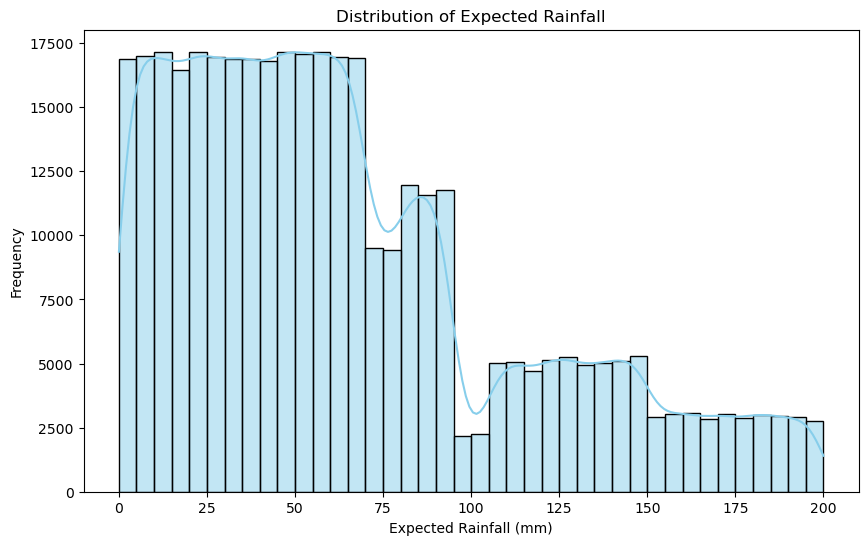

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already created the merged_table DataFrame

# Create a distribution plot for 'expected_rainfall'
plt.figure(figsize=(10, 6))
sns.histplot(merged_table['expected_rainfall'], bins=40, kde=True, color='skyblue')

# Set plot labels and title
plt.xlabel('Expected Rainfall (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Expected Rainfall')

# Show the plot
plt.show()


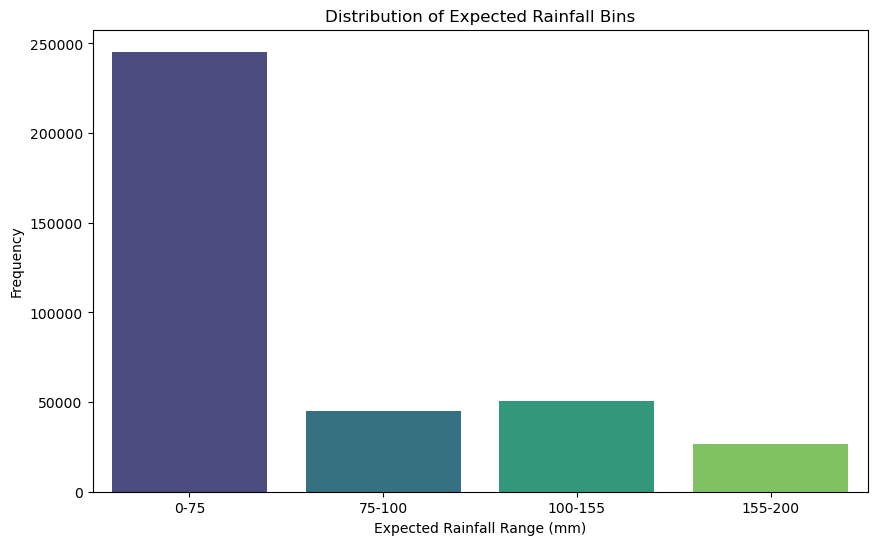

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already created the merged_table DataFrame

# Define the bin edges
bin_edges = [0, 75, 100, 155, 200]

# Create bins and assign labels
merged_table['rainfall_bins'] = pd.cut(merged_table['expected_rainfall'], bins=bin_edges, labels=['0-75', '75-100', '100-155', '155-200'])

# Count the frequency in each bin
bin_counts = merged_table['rainfall_bins'].value_counts()

# Create a bar plot for the binned rainfall
plt.figure(figsize=(10, 6))
sns.barplot(x=bin_counts.index, y=bin_counts.values, palette='viridis')

# Set plot labels and title
plt.xlabel('Expected Rainfall Range (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Expected Rainfall Bins')

# Show the plot
plt.show()


In [19]:
merged_table = pd.get_dummies(merged_table, columns=['rainfall_bins'], prefix='rainfall_bin')
merged_table.head()

,distributor_id,outlet_id,outlet_size,population_density,number_of_skus_sold,average_household_income,transaction_time,expected_rainfall,sales_quantity,region_outstation,region_upcountry,region_western,freezer_status_binary,sku_name_label_encoded,rainfall_bin_0-75,rainfall_bin_75-100,rainfall_bin_100-155,rainfall_bin_155-200
0,24,1,1334,276,16,81704,2023-01-06 10:51,60.00,4,1,0,0,1,2,1,0,0,0
1,24,1,1334,276,16,81704,2023-01-12 15:14,6.00,5,1,0,0,1,2,1,0,0,0
2,24,1,1334,276,16,81704,2023-01-16 16:25,82.00,5,1,0,0,1,2,0,1,0,0
3,24,1,1334,276,16,81704,2023-01-24 8:55,172.53,7,1,0,0,1,2,0,0,0,1
4,24,1,1334,276,16,81704,2023-02-04 9:53,59.00,5,1,0,0,1,2,1,0,0,0


In [20]:
merged_table.drop(columns=['expected_rainfall'], inplace=True)
merged_table.head()

,distributor_id,outlet_id,outlet_size,population_density,number_of_skus_sold,average_household_income,transaction_time,sales_quantity,region_outstation,region_upcountry,region_western,freezer_status_binary,sku_name_label_encoded,rainfall_bin_0-75,rainfall_bin_75-100,rainfall_bin_100-155,rainfall_bin_155-200
0,24,1,1334,276,16,81704,2023-01-06 10:51,4,1,0,0,1,2,1,0,0,0
1,24,1,1334,276,16,81704,2023-01-12 15:14,5,1,0,0,1,2,1,0,0,0
2,24,1,1334,276,16,81704,2023-01-16 16:25,5,1,0,0,1,2,0,1,0,0
3,24,1,1334,276,16,81704,2023-01-24 8:55,7,1,0,0,1,2,0,0,0,1
4,24,1,1334,276,16,81704,2023-02-04 9:53,5,1,0,0,1,2,1,0,0,0


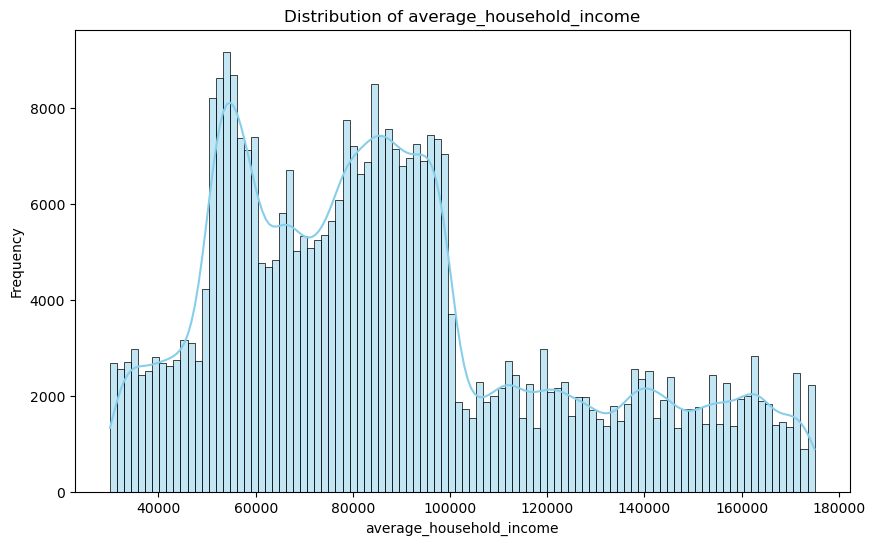

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_table['average_household_income'], bins=100, kde=True, color='skyblue')

# Set plot labels and title
plt.xlabel('average_household_income')
plt.ylabel('Frequency')
plt.title('Distribution of average_household_income')

# Show the plot
plt.show()

In [22]:
# Assuming you have already created the merged_table DataFrame

# Define the bin edges for average_household_income
income_bin_edges = [0, 44286, 62857, 71428, 107143, 132857, 148571, 180000]

# Create bins and assign labels
merged_table['income_bins'] = pd.cut(merged_table['average_household_income'], bins=income_bin_edges, labels=['0-44286', '44286-62857', '62857-71428', '71428-107143', '107143-132857', '132857-148571', '148571-180000'])

# One-hot encode the 'income_bins' column
merged_table = pd.get_dummies(merged_table, columns=['income_bins'], prefix='income_bin')

# Display the updated DataFrame
merged_table.head()


,distributor_id,outlet_id,outlet_size,population_density,number_of_skus_sold,average_household_income,transaction_time,sales_quantity,region_outstation,region_upcountry,...,rainfall_bin_75-100,rainfall_bin_100-155,rainfall_bin_155-200,income_bin_0-44286,income_bin_44286-62857,income_bin_62857-71428,income_bin_71428-107143,income_bin_107143-132857,income_bin_132857-148571,income_bin_148571-180000
0,24,1,1334,276,16,81704,2023-01-06 10:51,4,1,0,...,0,0,0,0,0,0,1,0,0,0
1,24,1,1334,276,16,81704,2023-01-12 15:14,5,1,0,...,0,0,0,0,0,0,1,0,0,0
2,24,1,1334,276,16,81704,2023-01-16 16:25,5,1,0,...,1,0,0,0,0,0,1,0,0,0
3,24,1,1334,276,16,81704,2023-01-24 8:55,7,1,0,...,0,0,1,0,0,0,1,0,0,0
4,24,1,1334,276,16,81704,2023-02-04 9:53,5,1,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
merged_table.drop(columns=['average_household_income'], inplace=True)
merged_table.head()

,distributor_id,outlet_id,outlet_size,population_density,number_of_skus_sold,transaction_time,sales_quantity,region_outstation,region_upcountry,region_western,...,rainfall_bin_75-100,rainfall_bin_100-155,rainfall_bin_155-200,income_bin_0-44286,income_bin_44286-62857,income_bin_62857-71428,income_bin_71428-107143,income_bin_107143-132857,income_bin_132857-148571,income_bin_148571-180000
0,24,1,1334,276,16,2023-01-06 10:51,4,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,24,1,1334,276,16,2023-01-12 15:14,5,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,24,1,1334,276,16,2023-01-16 16:25,5,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,24,1,1334,276,16,2023-01-24 8:55,7,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,24,1,1334,276,16,2023-02-04 9:53,5,1,0,0,...,0,0,0,0,0,0,1,0,0,0


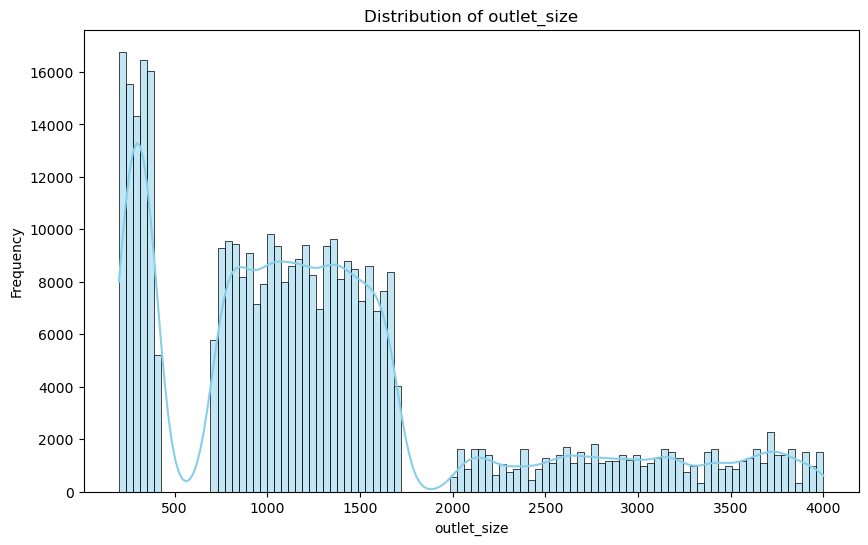

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_table['outlet_size'], bins=100, kde=True, color='skyblue')

# Set plot labels and title
plt.xlabel('outlet_size')
plt.ylabel('Frequency')
plt.title('Distribution of outlet_size')

# Show the plot
plt.show()

In [25]:
size_bin_edges = [0, 500, 1900, 4000]

# Create bins and assign labels
merged_table['size_bins'] = pd.cut(merged_table['outlet_size'], bins=size_bin_edges, labels=['0-500', '500-1900', '1900-4000'])

# One-hot encode the 'size_bins' column
merged_table = pd.get_dummies(merged_table, columns=['size_bins'], prefix='size_bin')


merged_table.drop(columns=['outlet_size'], inplace=True)
merged_table.head()

,distributor_id,outlet_id,population_density,number_of_skus_sold,transaction_time,sales_quantity,region_outstation,region_upcountry,region_western,freezer_status_binary,...,income_bin_0-44286,income_bin_44286-62857,income_bin_62857-71428,income_bin_71428-107143,income_bin_107143-132857,income_bin_132857-148571,income_bin_148571-180000,size_bin_0-500,size_bin_500-1900,size_bin_1900-4000
0,24,1,276,16,2023-01-06 10:51,4,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,24,1,276,16,2023-01-12 15:14,5,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,24,1,276,16,2023-01-16 16:25,5,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,24,1,276,16,2023-01-24 8:55,7,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,24,1,276,16,2023-02-04 9:53,5,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


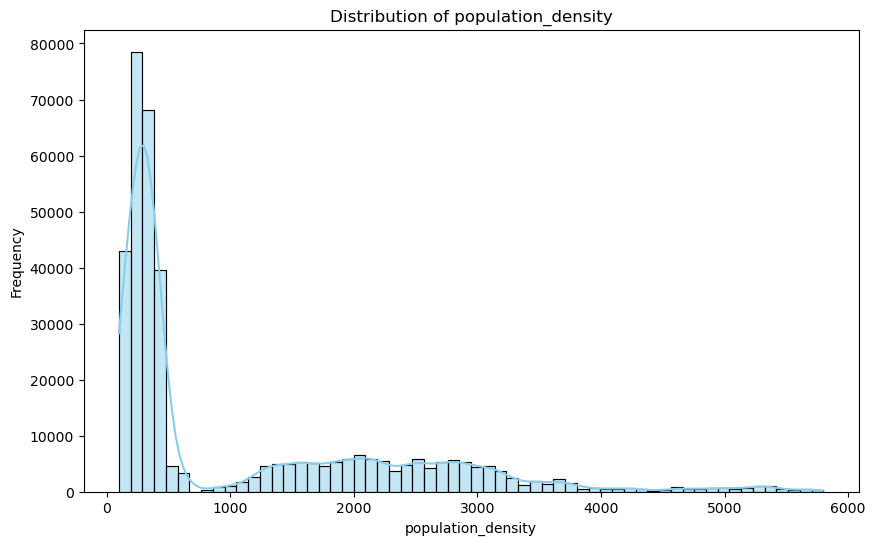

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_table['population_density'], bins=60, kde=True, color='skyblue')

# Set plot labels and title
plt.xlabel('population_density')
plt.ylabel('Frequency')
plt.title('Distribution of population_density')

# Show the plot
plt.show()

In [27]:
size_bin_edges = [0, 762, 4500, 6000]

# Create bins and assign labels
merged_table['population_bins'] = pd.cut(merged_table['population_density'], bins=size_bin_edges, labels=['0-762', '762-4500', '4500-6000'])

# One-hot encode the 'size_bins' column
merged_table = pd.get_dummies(merged_table, columns=['population_bins'], prefix='population_bins')


merged_table.drop(columns=['population_density'], inplace=True)
merged_table.head()

,distributor_id,outlet_id,number_of_skus_sold,transaction_time,sales_quantity,region_outstation,region_upcountry,region_western,freezer_status_binary,sku_name_label_encoded,...,income_bin_71428-107143,income_bin_107143-132857,income_bin_132857-148571,income_bin_148571-180000,size_bin_0-500,size_bin_500-1900,size_bin_1900-4000,population_bins_0-762,population_bins_762-4500,population_bins_4500-6000
0,24,1,16,2023-01-06 10:51,4,1,0,0,1,2,...,1,0,0,0,0,1,0,1,0,0
1,24,1,16,2023-01-12 15:14,5,1,0,0,1,2,...,1,0,0,0,0,1,0,1,0,0
2,24,1,16,2023-01-16 16:25,5,1,0,0,1,2,...,1,0,0,0,0,1,0,1,0,0
3,24,1,16,2023-01-24 8:55,7,1,0,0,1,2,...,1,0,0,0,0,1,0,1,0,0
4,24,1,16,2023-02-04 9:53,5,1,0,0,1,2,...,1,0,0,0,0,1,0,1,0,0


In [28]:
# Assuming 'transaction_time' is a column in the merged_table dataframe
merged_table['transaction_time'] = pd.to_datetime(merged_table['transaction_time'])

# Extracting features
merged_table['dayofweek'] = merged_table['transaction_time'].dt.dayofweek
merged_table['day'] = merged_table['transaction_time'].dt.day  # Added line for day
merged_table['month'] = merged_table['transaction_time'].dt.month
merged_table['quarter'] = merged_table['transaction_time'].dt.quarter
merged_table['year'] = merged_table['transaction_time'].dt.year
merged_table['time'] = merged_table['transaction_time'].dt.time

merged_table.drop(columns=['transaction_time'], inplace=True)
merged_table.head()

,distributor_id,outlet_id,number_of_skus_sold,sales_quantity,region_outstation,region_upcountry,region_western,freezer_status_binary,sku_name_label_encoded,rainfall_bin_0-75,...,size_bin_1900-4000,population_bins_0-762,population_bins_762-4500,population_bins_4500-6000,dayofweek,day,month,quarter,year,time
0,24,1,16,4,1,0,0,1,2,1,...,0,1,0,0,4,6,1,1,2023,10:51:00
1,24,1,16,5,1,0,0,1,2,1,...,0,1,0,0,3,12,1,1,2023,15:14:00
2,24,1,16,5,1,0,0,1,2,0,...,0,1,0,0,0,16,1,1,2023,16:25:00
3,24,1,16,7,1,0,0,1,2,0,...,0,1,0,0,1,24,1,1,2023,08:55:00
4,24,1,16,5,1,0,0,1,2,1,...,0,1,0,0,5,4,2,1,2023,09:53:00


In [29]:
# Assuming 'time' is a column in the merged_table dataframe
merged_table['time'] = pd.to_datetime(merged_table['time'], format='%H:%M:%S')

# Creating synthetic features for morning, evening, and nighttime
merged_table['morning'] = ((merged_table['time'].dt.hour >= 6) & (merged_table['time'].dt.hour < 12)).astype(int)
merged_table['evening'] = ((merged_table['time'].dt.hour >= 12) & (merged_table['time'].dt.hour < 18)).astype(int)
merged_table['night'] = ((merged_table['time'].dt.hour >= 18) | (merged_table['time'].dt.hour < 6)).astype(int)

merged_table.drop(columns=['time'], inplace=True)
merged_table.head()

,distributor_id,outlet_id,number_of_skus_sold,sales_quantity,region_outstation,region_upcountry,region_western,freezer_status_binary,sku_name_label_encoded,rainfall_bin_0-75,...,population_bins_762-4500,population_bins_4500-6000,dayofweek,day,month,quarter,year,morning,evening,night
0,24,1,16,4,1,0,0,1,2,1,...,0,0,4,6,1,1,2023,1,0,0
1,24,1,16,5,1,0,0,1,2,1,...,0,0,3,12,1,1,2023,0,1,0
2,24,1,16,5,1,0,0,1,2,0,...,0,0,0,16,1,1,2023,0,1,0
3,24,1,16,7,1,0,0,1,2,0,...,0,0,1,24,1,1,2023,1,0,0
4,24,1,16,5,1,0,0,1,2,1,...,0,0,5,4,2,1,2023,1,0,0


In [30]:
merged_table.drop(columns=['year'], inplace=True)

In [31]:
print(merged_table)

        distributor_id  outlet_id  number_of_skus_sold  sales_quantity  \
0                   24          1                   16               4   
1                   24          1                   16               5   
2                   24          1                   16               5   
3                   24          1                   16               7   
4                   24          1                   16               5   
...                ...        ...                  ...             ...   
371031              14       4200                   23               3   
371032              14       4200                   23               6   
371033              14       4200                   23               8   
371034              14       4200                   23               7   
371035              14       4200                   23              10   

        region_outstation  region_upcountry  region_western  \
0                       1                 0     

In [32]:
feature_names = merged_table.columns.tolist()
print(feature_names)

['distributor_id', 'outlet_id', 'number_of_skus_sold', 'sales_quantity', 'region_outstation', 'region_upcountry', 'region_western', 'freezer_status_binary', 'sku_name_label_encoded', 'rainfall_bin_0-75', 'rainfall_bin_75-100', 'rainfall_bin_100-155', 'rainfall_bin_155-200', 'income_bin_0-44286', 'income_bin_44286-62857', 'income_bin_62857-71428', 'income_bin_71428-107143', 'income_bin_107143-132857', 'income_bin_132857-148571', 'income_bin_148571-180000', 'size_bin_0-500', 'size_bin_500-1900', 'size_bin_1900-4000', 'population_bins_0-762', 'population_bins_762-4500', 'population_bins_4500-6000', 'dayofweek', 'day', 'month', 'quarter', 'morning', 'evening', 'night']


c:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_k

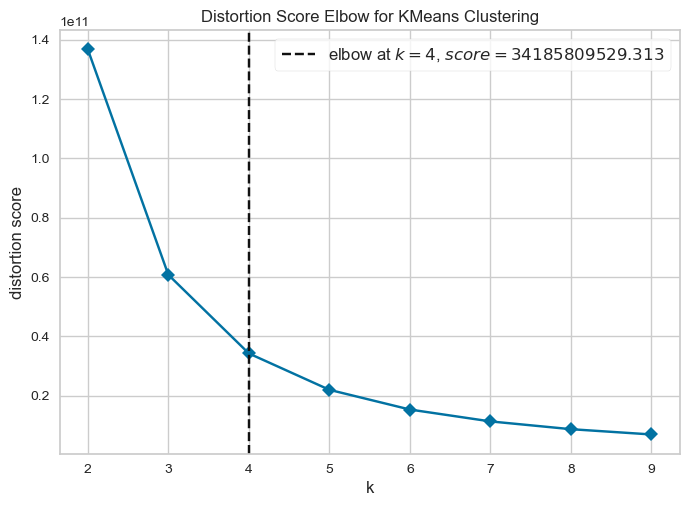

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Assuming you have already created the merged_table DataFrame

# Select features for clustering (adjust as needed)
features_for_clustering = feature_names
# # Select the number of clusters (adjust as needed)
n_clusters = 4

# # Create a subset of the DataFrame with selected features
X = merged_table[features_for_clustering]

# # Fit KMeans clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
merged_table['cluster'] = kmeans.fit_predict(X)

# Plot the elbow method
visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.show()

# Display the updated DataFrame with cluster assignments
# print(merged_table[['outlet_id', 'cluster']])


In [47]:
merged_table.head()

,distributor_id,outlet_id,number_of_skus_sold,sales_quantity,region_outstation,region_upcountry,region_western,freezer_status_binary,sku_name_label_encoded,rainfall_bin_0-75,...,population_bins_762-4500,population_bins_4500-6000,dayofweek,day,month,quarter,morning,evening,night,cluster
0,24,1,16,4,1,0,0,1,2,1,...,0,0,4,6,1,1,1,0,0,3
1,24,1,16,5,1,0,0,1,2,1,...,0,0,3,12,1,1,0,1,0,3
2,24,1,16,5,1,0,0,1,2,0,...,0,0,0,16,1,1,0,1,0,3
3,24,1,16,7,1,0,0,1,2,0,...,0,0,1,24,1,1,1,0,0,3
4,24,1,16,5,1,0,0,1,2,1,...,0,0,5,4,2,1,1,0,0,3


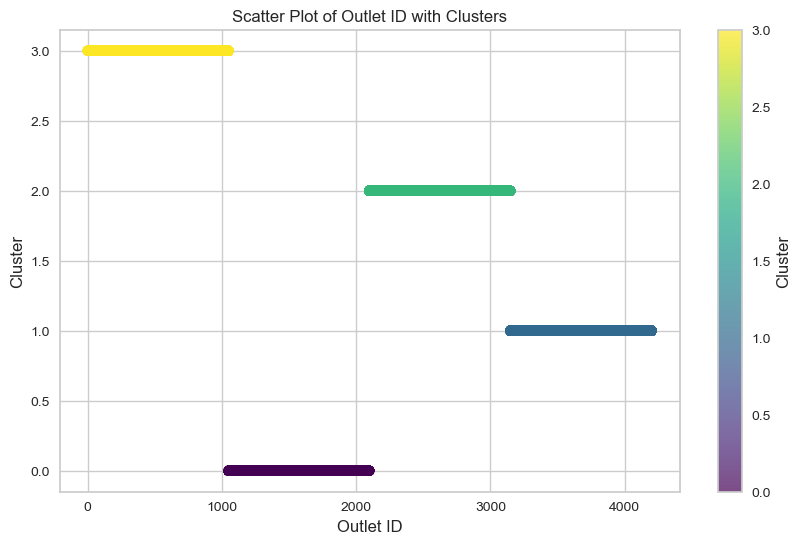

In [48]:
import matplotlib.pyplot as plt

# Assuming you have already created the merged_table DataFrame and assigned clusters
# Uncomment the following line if not already assigned
# merged_table['cluster'] = kmeans.fit_predict(X)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_table['outlet_id'], merged_table['cluster'], c=merged_table['cluster'], cmap='viridis', marker='o', alpha=0.7)

# Set plot labels and title
plt.xlabel('Outlet ID')
plt.ylabel('Cluster')
plt.title('Scatter Plot of Outlet ID with Clusters')

# Show the colorbar
cbar = plt.colorbar()
cbar.set_label('Cluster')

# Show the plot
plt.show()


In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Assuming you have already created the merged_table DataFrame

# Select features for clustering (adjust as needed)
features_for_clustering = feature_names
# # Select the number of clusters (adjust as needed)
n_clusters = 4

# # Create a subset of the DataFrame with selected features
X = merged_table[features_for_clustering]
X.drop(columns=['outlet_id'], inplace=True)
X.drop(columns=['distributor_id'], inplace=True)

# # Fit KMeans clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
merged_table['cluster'] = kmeans.fit_predict(X)

C:\Users\ACER\AppData\Local\Temp\ipykernel_30332\417696966.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['outlet_id'], inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30332\417696966.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['distributor_id'], inplace=True)
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


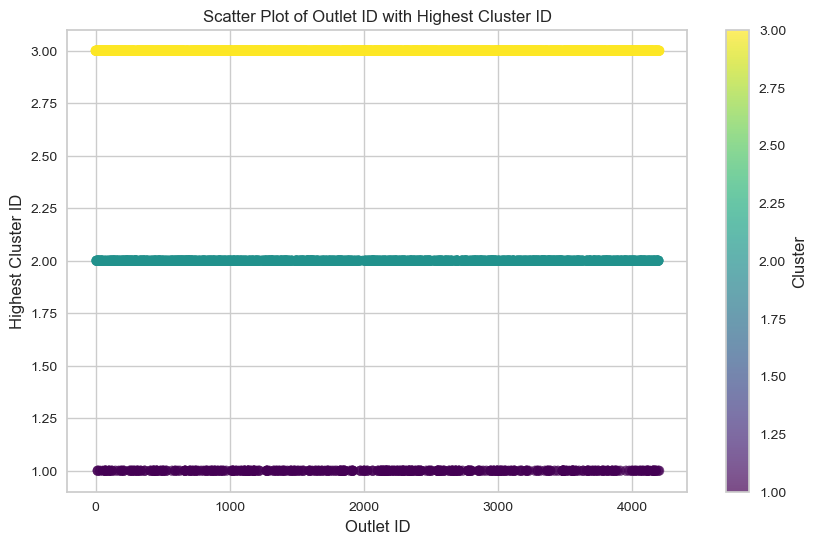

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already created the merged_table DataFrame and assigned clusters
# Uncomment the following line if not already assigned
# merged_table['cluster'] = kmeans.fit_predict(X)

# Find the highest cluster ID for each outlet_id
outlet_max_cluster = merged_table.groupby('outlet_id')['cluster'].max().reset_index()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(outlet_max_cluster['outlet_id'], outlet_max_cluster['cluster'], c=outlet_max_cluster['cluster'], cmap='viridis', marker='o', alpha=0.7)

# Set plot labels and title
plt.xlabel('Outlet ID')
plt.ylabel('Highest Cluster ID')
plt.title('Scatter Plot of Outlet ID with Highest Cluster ID')

# Show the colorbar
cbar = plt.colorbar()
cbar.set_label('Cluster')

# Show the plot
plt.show()


In [53]:
merged_table.head()

,distributor_id,outlet_id,number_of_skus_sold,sales_quantity,region_outstation,region_upcountry,region_western,freezer_status_binary,sku_name_label_encoded,rainfall_bin_0-75,...,population_bins_762-4500,population_bins_4500-6000,dayofweek,day,month,quarter,morning,evening,night,cluster
0,24,1,16,4,1,0,0,1,2,1,...,0,0,4,6,1,1,1,0,0,2
1,24,1,16,5,1,0,0,1,2,1,...,0,0,3,12,1,1,0,1,0,2
2,24,1,16,5,1,0,0,1,2,0,...,0,0,0,16,1,1,0,1,0,0
3,24,1,16,7,1,0,0,1,2,0,...,0,0,1,24,1,1,1,0,0,0
4,24,1,16,5,1,0,0,1,2,1,...,0,0,5,4,2,1,1,0,0,2


In [64]:
print(merged_table['cluster'].value_counts().where(merged_table['outlet_id'] == 1))

2    132801
0    130753
1     82605
3     24877
Name: cluster, dtype: int64


In [63]:
merged_table['cluster'].value_counts()

2    132801
0    130753
1     82605
3     24877
Name: cluster, dtype: int64

In [65]:
merged_table.head()

,distributor_id,outlet_id,number_of_skus_sold,sales_quantity,region_outstation,region_upcountry,region_western,freezer_status_binary,sku_name_label_encoded,rainfall_bin_0-75,...,population_bins_762-4500,population_bins_4500-6000,dayofweek,day,month,quarter,morning,evening,night,cluster
0,24,1,16,4,1,0,0,1,2,1,...,0,0,4,6,1,1,1,0,0,2
1,24,1,16,5,1,0,0,1,2,1,...,0,0,3,12,1,1,0,1,0,2
2,24,1,16,5,1,0,0,1,2,0,...,0,0,0,16,1,1,0,1,0,0
3,24,1,16,7,1,0,0,1,2,0,...,0,0,1,24,1,1,1,0,0,0
4,24,1,16,5,1,0,0,1,2,1,...,0,0,5,4,2,1,1,0,0,2


In [66]:
outlet_id_to_check = 1

# Filter the DataFrame for the specified outlet_id
filtered_data = merged_table[merged_table['outlet_id'] == outlet_id_to_check]

# Count the occurrences of each cluster for the specified outlet_id
cluster_counts_for_outlet = filtered_data['cluster'].value_counts()

print(cluster_counts_for_outlet)


0    42
2    41
3     2
Name: cluster, dtype: int64


In [67]:
highest_cluster_for_outlet = {}

for outlet_id in merged_table['outlet_id'].unique():
    # Filter the DataFrame for the current outlet_id
    filtered_data = merged_table[merged_table['outlet_id'] == outlet_id]

    # Count the occurrences of each cluster for the current outlet_id
    cluster_counts_for_outlet = filtered_data['cluster'].value_counts()

    # Find the cluster with the highest occurrence
    highest_cluster = cluster_counts_for_outlet.idxmax()

    # Store the result in the dictionary
    highest_cluster_for_outlet[outlet_id] = highest_cluster

# Print the results
for outlet_id, highest_cluster in highest_cluster_for_outlet.items():
    print(f"Outlet ID: {outlet_id}, Highest Occurred Cluster: {highest_cluster}")


Outlet ID: 1, Highest Occurred Cluster: 0
Outlet ID: 2, Highest Occurred Cluster: 2
Outlet ID: 3, Highest Occurred Cluster: 0
Outlet ID: 4, Highest Occurred Cluster: 0
Outlet ID: 5, Highest Occurred Cluster: 1
Outlet ID: 6, Highest Occurred Cluster: 0
Outlet ID: 7, Highest Occurred Cluster: 0
Outlet ID: 8, Highest Occurred Cluster: 2
Outlet ID: 9, Highest Occurred Cluster: 0
Outlet ID: 10, Highest Occurred Cluster: 1
Outlet ID: 11, Highest Occurred Cluster: 3
Outlet ID: 12, Highest Occurred Cluster: 0
Outlet ID: 13, Highest Occurred Cluster: 1
Outlet ID: 14, Highest Occurred Cluster: 2
Outlet ID: 15, Highest Occurred Cluster: 2
Outlet ID: 16, Highest Occurred Cluster: 1
Outlet ID: 17, Highest Occurred Cluster: 1
Outlet ID: 18, Highest Occurred Cluster: 2
Outlet ID: 19, Highest Occurred Cluster: 0
Outlet ID: 20, Highest Occurred Cluster: 0
Outlet ID: 21, Highest Occurred Cluster: 0
Outlet ID: 22, Highest Occurred Cluster: 2
Outlet ID: 23, Highest Occurred Cluster: 0
Outlet ID: 24, Highe